### Problem Statement: Sales is going down or predict the sales for me.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

##### Step 01: Define the Hypothesis

In the Last Quarter, our sales has dipped 20%. Find the reason.

* Identify the FACTORS behind the Sales Dipping.
* Customers not coming.
* Veggies
* Clothes
* MacroEco Scenario - LOCKDOWN.....

These factors which you think are resp for the sales going down, are called
HYPOTHESIS.

##### Step 02: Hypothesis are submitted to the Client.
A follow up call is done in which the entire context is discussed and after that the client releases the data.

##### Step 03: Check if the Data has all the Hypothesis (Columns)
There will be some columns/features that you thought of and at the same time, there will be some features which will be missing. The brain stormed feature list will help me in feature engineering.

##### Step 04: Exploratory Data Analysis

1. Univariate Analysis - Single Variable Analysis

In any data, we see two types of Features - Numerical and Categorical.

* Numerical - Histogram | distplot.
* Categorical - Countplot/Frequency Plot.

Purpose: The purpose is to identify the features, shapes and "try to establish" a relation with the Target Variable.

2. Bivariate/Multivariate Analysis - Predictor Vs Target Variable.

Predictor(Num) vs Target (Num): Scatterplot | Linear Pattern, Uptrend, Downtrend.

Predict(Num) vs Target (Cat): Barplot, Boxplot as well as Violinplot.

Predict(Cat) vs Target (Cat): pd.crosstab() to create a pivot table and then we can plot the Countplot.











In [4]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing the Train and Test Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
# Preview the Data
train.head()

# Item Visibility has lots of 0s which needs fixing.
# The Items are clubbed and a single entry has been created.
# Store is spread out in several location
# When the Outlets were created.
# Outle Size has Missing Values.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Check the Dimensions of train & test
train.shape, test.shape # test columns = train cols - 1

((8523, 12), (5681, 11))

In [8]:
# Missing Values
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [9]:
# Missing Values
test.isnull().sum()[test.isnull().sum()!=0]

# Train and test has similar missing values.

Item_Weight     976
Outlet_Size    1606
dtype: int64

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Univariate Analysis

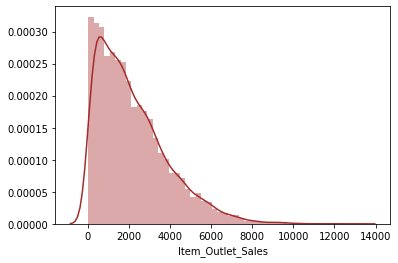

In [11]:
# Target Variable
sns.distplot(train.Item_Outlet_Sales, color = "brown")

# Sales is skewed.

In [12]:
# Check the Dist of Sales
train.Item_Outlet_Sales.describe()

# Mean>Median>Mode - Positively Skewed Data.
# Mean< Median < Mode - Negatively Skewed Data

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

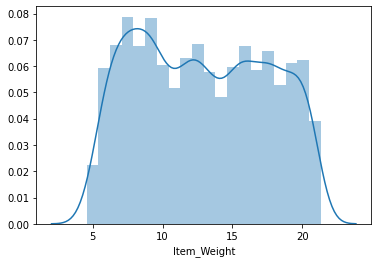

In [13]:
# Plot the Item Weight
sns.distplot(train.Item_Weight.dropna()) # seaborn is not compatible with missing values
plt.show()

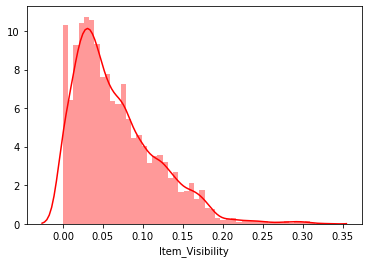

In [14]:
# Item Visibility
sns.distplot(train.Item_Visibility, color = "red")

# Visibility of products is skewed because bigger products will capture
# more area in the store and will be very much visible in comparison to Veggies.

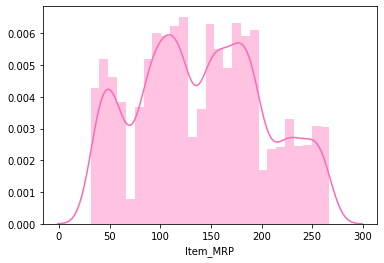

In [15]:
# Item Mrp
sns.distplot(train.Item_MRP, color = "hotpink")
plt.show()

# ITEM MRP has 04 different distributions. Need to Explore Further.

In [16]:
train.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

### SUMMARY - Univariate Analysis

1. Target Variable is skewed in nature with the average sales of 2196 dollars and a sd of 1700 and min sales of 31 dollard and max sales of 14000 dollars.

2. Similary, Item MRP shows 04 different price distributions with min MRP as 31 dollars and max MRP as 266 dollars.

3. Item Weight has no pattern in Univ Plot

4. Item Visibility is skewed in shape meaning some products have a higher visibility in comparison to the rest.

### Categorical Variables

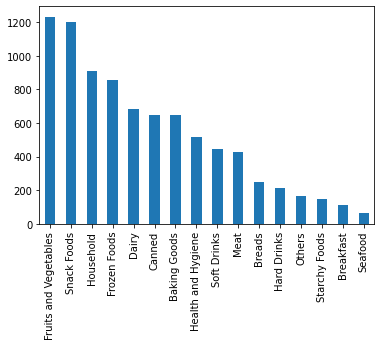

In [17]:
# Item Type
train.Item_Type.value_counts().plot(kind = "bar")

# Top5 are Fruits and Veggies, Dairy, Household, Snack & Frozen.

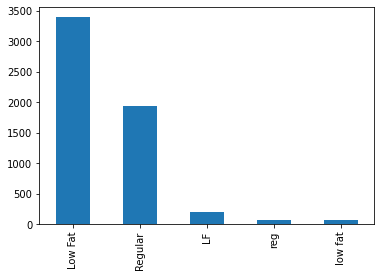

In [18]:
# Item Fat Content
test.Item_Fat_Content.value_counts().plot(kind = "bar")
# LF, low fat ~ Low Fat
# reg ~ Regular

In [19]:
# Item Fat Content
train.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                              value =["Low Fat", "Low Fat", "Regular"], inplace = True)

In [20]:
test.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                              value =["Low Fat", "Low Fat", "Regular"], inplace = True)

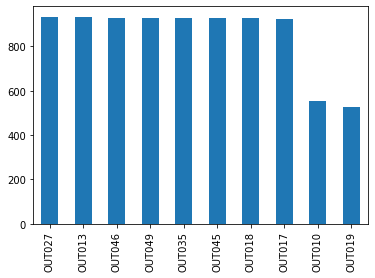

In [21]:
# Outlet ID
train.Outlet_Identifier.value_counts().plot(kind = "bar")

# OUTLET 27 is the Most Avilable Type of Outlet.
# Less No of OUTLETS - OUTLET 10 & OUTLET19

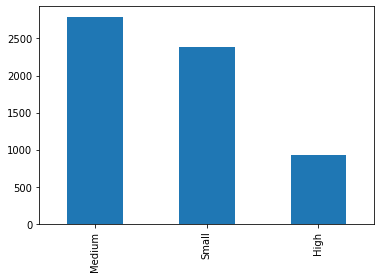

In [22]:
# Outlet Size
train.Outlet_Size.value_counts().plot(kind = "bar")

# Medium Size Outlets are the most visible outlets in the market

### Summary of Univariate Analysis

1. Average Sales is 2196 dollars.

2. Most of the Outlets are Medium Size Outlets

3. The Most Visible Outlet is OUT27

4. The products are sell the most are Fruits and Veggies, Frozen, Dairy, Household Items & Snacks.

5. Most of the products that sell are Low Fat Content.

6. Some Items have bigger visibility in comparison to rest. Keeping above points in mind, less visible items are selling the most.


### Bivariate Analysis - Num Vs Num
 
Analyising the Predictor vs Target


In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


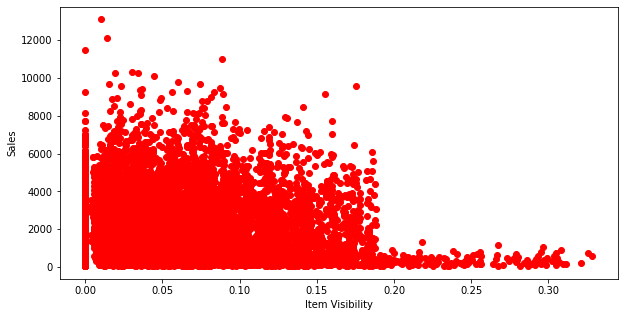

In [24]:
# Item Visibility Vs Sales
plt.figure(figsize = [10, 5])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "red")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

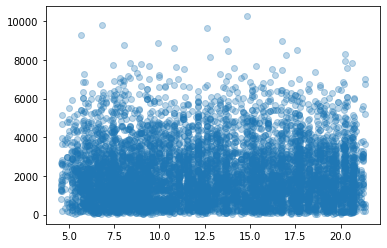

In [25]:
# Item Weight Vs Sales
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, alpha = 0.3)
plt.show()

# Inference: There is no specific pattern of Sales with Item Weight

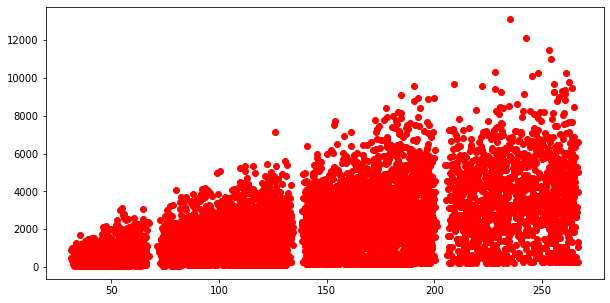

In [26]:
# Item MRP vs Sales
plt.figure(figsize = [10,5])
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "red")
plt.show()

# ITEM MRP is not given for a single item. These Prices are Combined/
# Total Prices of certain quantities.

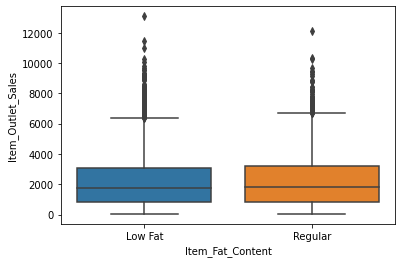

In [27]:
# Bivariate - Cat Vs Numerical | Boxplot

# Item Fat Content Vs Sales
sns.boxplot(x = "Item_Fat_Content", y  = "Item_Outlet_Sales", data = train)
plt.show()

In [28]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


In [29]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

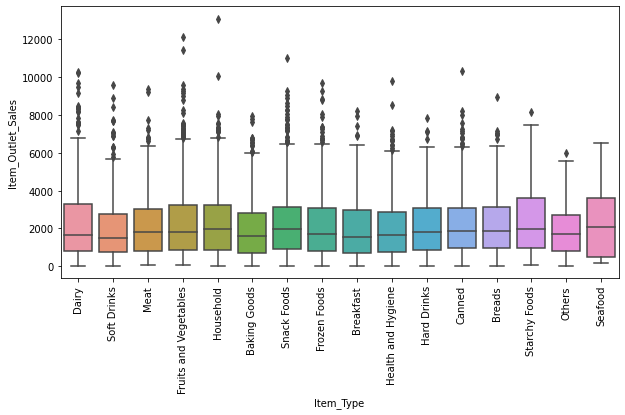

In [30]:
# Item Type Vs Sales
plt.figure(figsize = [10,5])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

#### Inference:

1. Seafood has a high MRP and hence the sales is high. It is competing with the regular items.
2. Snack Foods, Dairy, Fruits and Veggies, Household Items are selling the most.

Find out the List of all the Items for which the sales is above 8K dollars.

In [31]:
train.loc[train.Item_Outlet_Sales>8000, "Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat'], dtype=object)

In [32]:
train[train.Item_Outlet_Sales>8000]["Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat'], dtype=object)

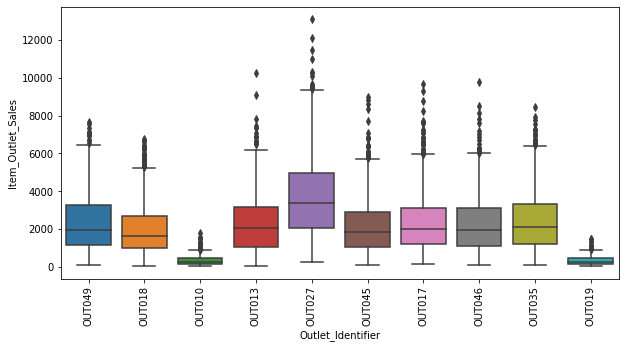

In [33]:
# Outlet Id vs Sales
plt.figure(figsize = [10,5])
sns.boxplot(x = "Outlet_Identifier", y ="Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Out27 is the Star Outlet whereas Out10 and Out19 are the least performers

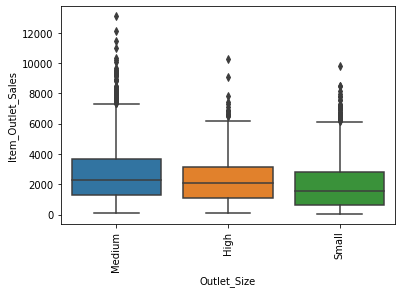

In [34]:
# Outlet Size vs Sales
sns.boxplot(x = "Outlet_Size", y ="Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Since Out27 is the best outlet and so the medium size outlets are better fitted.


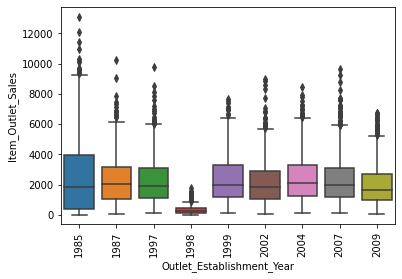

In [35]:
sns.boxplot(x = "Outlet_Establishment_Year", y ="Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

In [36]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

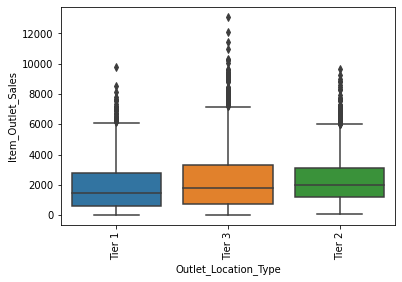

In [37]:
sns.boxplot(x = "Outlet_Location_Type", y ="Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Much of the Sales is happening in TIER3 Cities.

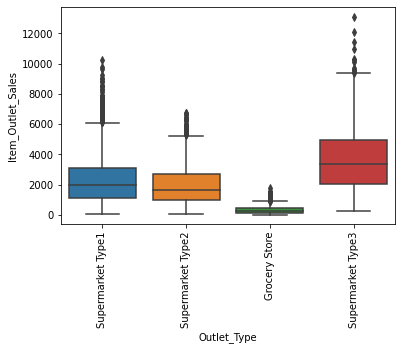

In [38]:
sns.boxplot(x = "Outlet_Type", y ="Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

### Summary - Bivariate Analysis

1. Low Fat Items have a higher sales than the Regular Items

2. Seafood has a high MRP and Low Demand where as the products that have made money over 8K are ['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat']
       
3. 1985 Store is the oldest store and is really making a good money. Suggestion: Create Brand Perception in the eyes of Customer.

4. Tier 3 City, Medium Size Outlet with Theme of OUT027 and S3 will be a better combination if we are planning to operate business in a new city.


### Missing Values Imputation

In [39]:
train.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [40]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [41]:
# Item Type
train.groupby("Item_Type")["Item_Weight"].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,536.000000,204.000000,89.000000,539.000000,566.000000,718.000000,1019.000000,183.000000,430.000000,759.000000,337.000000,137.000000,51.000000,988.000000,374.000000,130.000000
mean,12.277108,11.346936,12.768202,12.305705,13.426069,12.867061,13.224769,11.400328,13.142314,13.384736,12.817344,13.853285,12.552843,12.987880,11.847460,13.690731
std,4.773622,4.440540,5.038131,4.586564,4.686532,4.507383,4.575275,4.239144,4.512313,4.998845,4.670812,4.225534,5.473830,4.531256,4.403699,4.010061
min,4.880000,4.635000,6.425000,4.615000,4.805000,4.555000,5.460000,4.610000,5.175000,5.030000,5.150000,5.500000,5.365000,5.095000,4.590000,6.695000
25%,8.235000,7.128750,8.060000,8.115000,9.277500,8.935000,9.195000,8.260000,9.695000,8.695000,9.300000,10.650000,7.420000,9.195000,8.260000,11.500000
50%,11.650000,10.600000,10.695000,12.150000,13.350000,12.850000,13.100000,10.100000,12.150000,13.150000,12.350000,14.500000,11.650000,13.150000,11.800000,13.175000
75%,15.750000,14.850000,17.250000,16.250000,17.600000,17.000000,17.100000,14.850000,17.600000,18.350000,17.200000,17.750000,17.750000,16.850000,15.350000,16.700000
max,20.850000,20.850000,21.100000,21.350000,20.700000,20.850000,21.350000,19.700000,21.250000,21.250000,21.250000,20.500000,20.750000,21.250000,20.750000,21.200000


In [42]:
train[train.Item_Identifier == "DRG01"]["Item_Weight"]

# Products are kept in box and then the box is labeled.

544     14.8
1218    14.8
3005     NaN
5974     NaN
8522    14.8
Name: Item_Weight, dtype: float64

In [43]:
# Impute Item Weight Basis the Item ID. - Loop and Lambda
df = train.copy()

In [44]:
# Lambda - Single One Time Loop Function that is created without the need of saving it.
# Use Lambda to fill the values using Mean
# Transform the Column -impute the missing values...

# Group all the IDs & Fill the values basis the ID
df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [45]:
df.Item_Weight.isnull().sum()

4

In [46]:
# Location where the Missing Value Exists in the Data
locs = train[train.Item_Weight.isnull()].index

In [47]:
# ID of these locations
ids = train[train.Item_Weight.isnull()]["Item_Identifier"]

In [48]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [49]:
train.iloc[27, 1] = train.loc[train.Item_Identifier=="FDI18", "Item_Weight"].mean()
# Location and ID

In [50]:
for i in locs:
    train.iloc[i, 1] = train.loc[train.Item_Identifier==ids[i], "Item_Weight"].mean()

In [51]:
train.Item_Weight.isnull().sum()

5

In [52]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
27,DRJ59,NaN,Low Fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [53]:
# Missing Values in the Test Set
test[test.Item_Weight.isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [54]:
# Row # 4, Col#1, test.iloc[4,1] = test.loc[test.Item_Identifier=="FDY38", "Item_Weight"].mean()

# Location Nos/Row Index Nos
# ITem ID.

# Item IDs
ids = test[test.Item_Weight.isnull()]["Item_Identifier"]

# List of all the rows where Item Weight is Missing
indexnos = test[test.Item_Weight.isnull()].index

In [55]:
# test.iloc[4,1] = test.loc[test.Item_Identifier=="FDY38", "Item_Weight"].mean()

for i in indexnos:
    test.iloc[i,1] = test.loc[test.Item_Identifier==ids[i], "Item_Weight"].mean()

In [56]:
test[test.Item_Weight.isnull()]
# Calculate the Mean of the Item Weight where the Type is Snack Food

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [57]:
newid = test[test.Item_Weight.isnull()].index
newitems = test[test.Item_Weight.isnull()]["Item_Type"]

In [58]:
for i in newid:
    test.iloc[i,1] = test.loc[test.Item_Type==newitems[i], "Item_Weight"].mean()

In [59]:
# Missing Values in Train
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
27,DRJ59,NaN,Low Fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [60]:
newids = train[train.Item_Weight.isnull()].index
newitem = train[train.Item_Weight.isnull()]["Item_Type"]

for i in newids:
    train.iloc[i,1] = train.loc[train.Item_Type==newitem[i], "Item_Weight"].mean()

In [61]:
print(train.isnull().sum()[train.isnull().sum()!=0])
print(test.isnull().sum()[test.isnull().sum()!=0])

Outlet_Size    2410
dtype: int64
Outlet_Size    1606
dtype: int64


### Outlet Size

What type of outlet it be, it depends on the Location & Type of City.

In [62]:
train.Outlet_Size.value_counts()

# Mode is Medium Type

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [63]:
pd.DataFrame(test.groupby(["Outlet_Size", 
                            "Outlet_Location_Type"])["Outlet_Type"].value_counts()).T

Outlet_Size                       High            Medium                    \
Outlet_Location_Type            Tier 3            Tier 1            Tier 3   
Outlet_Type          Supermarket Type1 Supermarket Type1 Supermarket Type3   
Outlet_Type                        621               620               624   

Outlet_Size                                        Small                \
Outlet_Location_Type                              Tier 1                 
Outlet_Type          Supermarket Type2 Supermarket Type1 Grocery Store   
Outlet_Type                        618               620           352   

Outlet_Size                             
Outlet_Location_Type            Tier 2  
Outlet_Type          Supermarket Type1  
Outlet_Type                        620

Rule:

1. Medium Outlets are S1, S2 and S3.

2. High Spaced Outlets are S1 only

3. S1 is Small in Tier 1 and Tier 2 and we have Grocery Stores.

In [64]:
outlets = test.loc[test.Outlet_Size.isnull()]

In [65]:
pd.DataFrame(outlets.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts()).T

Outlet_Location_Type,Tier 2,Tier 3
Outlet_Type,Supermarket Type1,Grocery Store
Outlet_Type,1236,370


In [66]:
train.loc[train.Outlet_Size.isnull(), "Outlet_Size"]="Small"
test.loc[test.Outlet_Size.isnull(), "Outlet_Size"]="Small"

In [67]:
# Remove 0s from Item Visibility

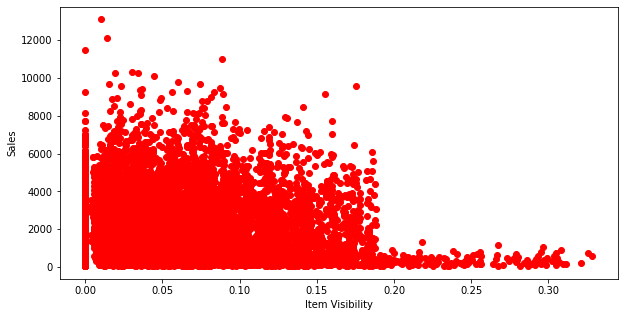

In [68]:
# Item Visibility Vs Sales
plt.figure(figsize = [10, 5])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "red")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

In [69]:
# Lambda to fill the values
#train.Item_Visibility.transform(x:x.replace(to_replace = 0, x.mean())) 
# Taking the Mean of Item IDs

train["Item_Visibility"]=train.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0, value = x.mean()))                      

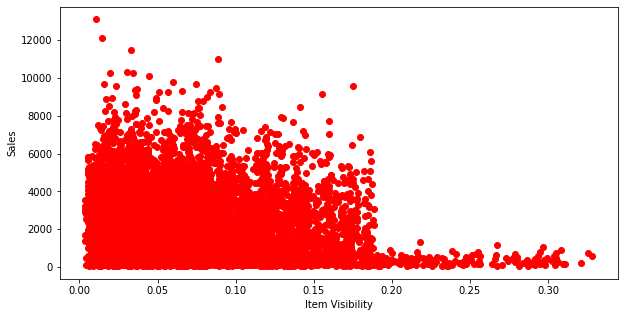

In [70]:
plt.figure(figsize = [10, 5])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "red")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

### Feature Engineering

1. Extracting New Features from the existing data
2. Transformation of the values
3. Dummying the data or introducing Dummies.

4. Outlet Est Years - 1985 Vintage Outlets, Outlets>1985 and Less than 2000< Medieval
and then 2000> Latest Outlets. Outlet Age (2013 - Out Est Year)

5. Drop the Outlet ID because Outlet Size is there. Another way to deal with this is that the Most Happening outlet is OUT027 & Rest as Others. The essence is to GENERALIZE the Info for ML Model.


6. Item_Type has been categorised in Perishables and Non Perishables

7. Item Identifier - FD: Food, DR - Drinks, NC - Non Consumables

In [71]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [72]:
# Outlet Age
train["Outlet_Age"] = 2013 - train.Outlet_Establishment_Year

test["Outlet_Age"] = 2013 - test.Outlet_Establishment_Year

In [73]:
def outlets(x):
    if(x=="OUT027"):
        return("OUT027")
    else:
        return("Others")

In [74]:
# Outlet_Cat
train["Outlet_Cat"] = train.Outlet_Identifier.apply(outlets)

test["Outlet_Cat"] = test.Outlet_Identifier.apply(outlets)

In [75]:
# Perishables & Non Perisbhables in Item_Type
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [76]:
perishables =['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast','Breads', 'Seafood']

In [77]:
def perish(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [78]:
train["Item_Category"] = train.Item_Type.apply(perish)

test["Item_Category"] = test.Item_Type.apply(perish)

In [79]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [80]:
train.groupby("Outlet_Size")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.6038,2050.6640,3166.37835,10256.6490
Medium,2793.0,2681.603542,1855.210528,69.2432,1270.3464,2251.0698,3691.19520,13086.9648
Small,4798.0,1867.182814,1570.580229,33.2900,583.2408,1484.0682,2758.40940,9779.9362


In [81]:
train.Item_Identifier[0][:2]

'FD'

In [82]:
# Extracting the Pattern from ITEM ID
ids = []

for i in train.Item_Identifier:
    ids.append(i[:2])

train["Item_ID"] =pd.Series(ids)

In [83]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Cat,Item_Category,Item_ID
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Others,Perishables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Others,Non Perishables,DR


In [84]:
train.Item_ID.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [85]:
# Impute Non Edible where the Item ID is NC
#train.loc[train.Item_ID=="NC", "Item_Fat_Content"]="Non Edible"

train.loc[train.Item_ID=="NC", "Item_Fat_Content"]="Non Edible"

In [86]:
train.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [87]:
# Price Per Unit/Item

train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight

test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [88]:
# Extracting the Pattern from ITEM ID
ids = []

for i in test.Item_Identifier:
    ids.append(i[:2])

test["Item_ID"] =pd.Series(ids)

test.loc[test.Item_ID=="NC", "Item_Fat_Content"]="Non Edible"

In [89]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Outlet_Cat',
       'Item_Category', 'Item_ID', 'Price_Per_Unit'],
      dtype='object')

In [90]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'Outlet_Cat', 'Item_Category',
       'Price_Per_Unit', 'Item_ID'],
      dtype='object')

In [91]:
len(train.columns), len(test.columns)

(17, 16)

In [92]:
# drop the Extra columns
newtrain = train.drop(['Item_Identifier', "Item_Type", "Outlet_Identifier", 
                       "Outlet_Establishment_Year"], axis = 1)


newtest = test.drop(['Item_Identifier', "Item_Type", "Outlet_Identifier", 
                       "Outlet_Establishment_Year"], axis = 1)

In [93]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Cat,Item_Category,Item_ID,Price_Per_Unit
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,Others,Perishables,FD,26.861204
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Others,Non Perishables,DR,8.153581
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,Others,Perishables,FD,8.092457
3,19.20,Regular,0.015274,182.0950,Small,Tier 3,Grocery Store,732.3800,15,Others,Perishables,FD,9.484115
4,8.93,Non Edible,0.008082,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Others,Non Perishables,NC,6.031512


In [94]:
np.corrcoef(train.Price_Per_Unit, train.Item_Outlet_Sales)

array([[1.        , 0.38345617],
       [0.38345617, 1.        ]])

In [95]:
np.cov(train.Price_Per_Unit, train.Item_Outlet_Sales)

array([[6.44164865e+01, 5.25194827e+03],
       [5.25194827e+03, 2.91214094e+06]])

In [96]:
import scipy.stats as stats
# Price Per Unit Vs Item Outlet Sales
stats.ttest_rel(newtrain.Price_Per_Unit, newtrain.Item_Outlet_Sales)

# Inf: That the Mean(Price Per Unit) & Mean(TV) is not same. Its different.
# Whether the Item Fat Content and Item Category are Independent of Each Other 
# Or have some relation.

# Ho: That the Categories are Independent of each other meaning happening of one event does 
# not have an impact on the other.

# H1: Ho is False.

# Frequency Table
array = pd.crosstab(newtrain.Item_Fat_Content, newtrain.Item_Category)

# Apply Chi Square - chi2_Contingency
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)

print(pvalue)


2.0907969684852738e-215


In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+Outlet_Location_Type+Outlet_Type+Outlet_Cat+Item_Category+Item_ID",
           data = newtrain).fit()

anova_tbl = sm.stats.anova_lm(model)
anova_tbl["PR(>F)"][:-1]<0.05 
#remove item_fat_content and outlet_cat

Item_Fat_Content        False
Outlet_Size              True
Outlet_Location_Type     True
Outlet_Type              True
Outlet_Cat              False
Item_Category            True
Item_ID                  True
Name: PR(>F), dtype: bool

In [98]:
model = ols("Item_Outlet_Sales~Item_Weight+Price_Per_Unit+Item_MRP",
           data = newtrain).fit()

anova_tbl = sm.stats.anova_lm(model)
anova_tbl["PR(>F)"][:-1]<0.05 
# Remove Item Weight


Item_Weight       False
Price_Per_Unit     True
Item_MRP           True
Name: PR(>F), dtype: bool

In [99]:
finaltrain = newtrain.drop(["Item_Weight", "Item_Fat_Content", "Outlet_Cat"], axis = 1)
finaltest = newtest.drop(["Item_Weight", "Item_Fat_Content", "Outlet_Cat"], axis = 1)
dummytrain = pd.get_dummies(finaltrain)
dummytest = pd.get_dummies(finaltest)

In [100]:
dummytrain

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Price_Per_Unit,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Non Perishables,Item_Category_Perishables,Item_ID_DR,Item_ID_FD,Item_ID_NC
0,0.016047,249.8092,3735.1380,14,26.861204,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,0.019278,48.2692,443.4228,4,8.153581,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0
2,0.016760,141.6180,2097.2700,14,8.092457,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0.015274,182.0950,732.3800,15,9.484115,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
4,0.008082,53.8614,994.7052,26,6.031512,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,2778.3834,26,31.248623,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
8519,0.046982,108.1570,549.2850,11,12.906563,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
8520,0.035186,85.1224,1193.1136,9,8.030415,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
8521,0.145221,103.1332,1845.5976,4,14.304189,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [101]:
#Base Submission
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})
solution

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


In [102]:
solution.to_csv('basemodel.csv',index=False)
#rmse for base model is 1773.825 as checked on solution checker

In [103]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

# Fit the Model on the Data and predict it

# Defined the Xtrain and YTrain
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred = dtree.fit(X,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("treebased.csv", index = False) # 1576.6406 rmse as checked on solution checker


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict,StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from sklearn.base import BaseEstimator
import xgboost as xgb
from xgboost import XGBRegressor



In [112]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [113]:
def stackedmodels():
    models = dict()
    models["LR"] = LinearRegression()
    models["Lasso"] = Lasso()
    models["Ridge"] = Ridge()
    models["Tree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["Bagg"] = BaggingRegressor()
    models["GBR"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    return(models)


In [120]:
# Time to Create the Cross Validation
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Note: Cross val score for Reg generates -ve value: -neg abolsute erro

def eval_models(model):
    cv_ = RepeatedKFold(n_splits=10,n_repeats = 5, random_state=1)
    scores = cross_val_score(model, X, y, scoring = "neg_mean_absolute_error",
                            cv = cv_, error_score="raise")
    return(scores)


In [121]:
stackedmodels().items()

dict_items([('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('Lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)), ('Tree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_

In [122]:
# Apply Loop so that scores can be generated for all the Models

models = stackedmodels()

# Evaluations
result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model) # Evaluation Funct that we have created
    result.append(scores) # Save the Cross Val Score
    names.append(name) # Save the Name of the Model
    print(">%s %3.f (%.3f)" % (name, scores.mean(), scores.std()))


>LR -838 (27.128)
>Lasso -838 (26.910)
>Ridge -838 (27.091)
>Tree -1057 (40.452)
>RF -824 (30.711)
>Bagg -822 (30.361)
>GBR -759 (25.890)
>XGB -809 (30.876)


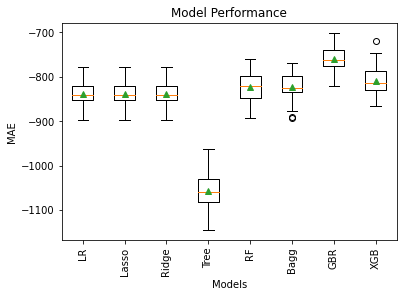

In [123]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()


In [124]:
# Fit the Model on the Data and predict it
gbr = GradientBoostingRegressor()
# Defined the Xtrain and YTrain
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred = gbr.fit(X,y).predict(dummytest)

# Export for submission


solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("gbr.csv", index = False) # 1576.6406 rmse as checked on solution checker




In [125]:
# Fit the Model on the Data and predict it
XGB = XGBRegressor()
# Defined the Xtrain and YTrain
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred = XGB.fit(X,y).predict(dummytest)

# Export for submission


solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("xgb.csv", index = False)